In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## bar plot with averages

In [3]:
tips_df = sns.load_dataset("tips");

In [4]:
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [18]:
bill_avg_df = tips_df[["total_bill"]].groupby(tips_df["day"]).mean()
# or 
# tips_df.groupby("day")[["total_bill"]].mean()
bill_avg_df

,total_bill
day,
Thur,17.682742
Fri,17.151579
Sat,20.441379
Sun,21.410000


<BarContainer object of 4 artists>

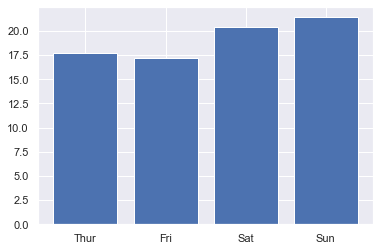

In [25]:
sns.set_theme(style="darkgrid")
plt.bar(bill_avg_df.index, bill_avg_df.total_bill)

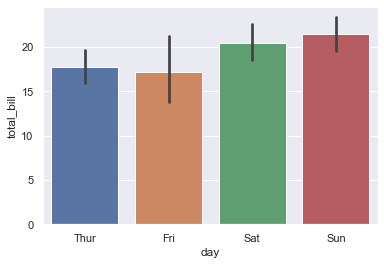

In [26]:
# but sns makes it easy
sns.barplot(x="day", y="total_bill", data=tips_df);
# it will atuomatically calculate avg of total_bill

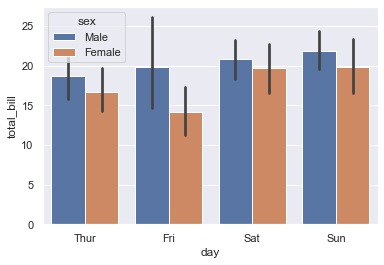

In [27]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips_df);

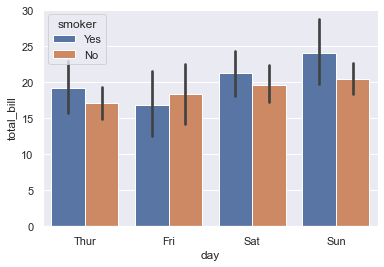

In [28]:
sns.barplot(x="day", y="total_bill", hue="smoker", data=tips_df);

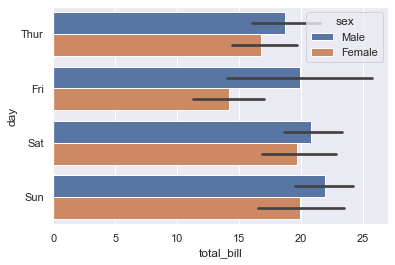

In [30]:
sns.barplot(y="day", x="total_bill", hue="sex", data=tips_df);
# just depends on you how u wanna see

## heatmap

In [41]:
# a heatmap is used to visualize 2-dimensional data like a matrix or a table using color.
# The best way to understand it is by looking at an example

flights_df = sns.load_dataset("flights")
flights_df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [44]:
flights_df = sns.load_dataset("flights").pivot("month", "year", "passengers")
flights_df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


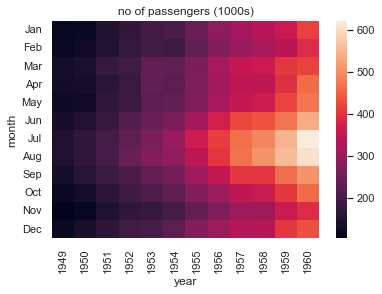

In [46]:
plt.title("no of passengers (1000s)")
sns.heatmap(flights_df);

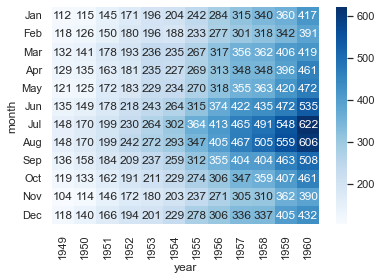

In [53]:
# we can also show values
sns.heatmap(flights_df, fmt='d', annot=True, cmap="Blues");

## images

In [59]:
from urllib.request import urlretrieve

In [62]:
urlretrieve("https://i.imgur.com/SkPbg.jpg","chart.jpg");

In [64]:
# before a image can be displayed. It has to be read into memory using PIL module
from PIL import Image
img = Image.open("chart.jpg")

In [66]:
type(img)
# under the hood it is using a numpy array

PIL.PngImagePlugin.PngImageFile

(-0.5, 160.5, 80.5, -0.5)

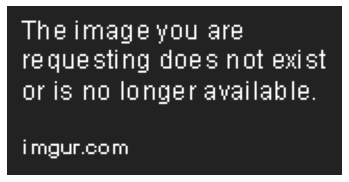

In [71]:
plt.imshow(img);
plt.axis("off") # for not displaying axis..

In [69]:
img_arr = np.array(img)
img_arr.shape

(81, 161)

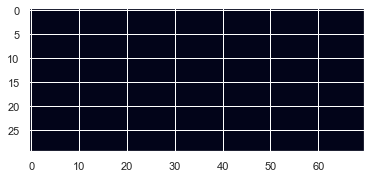

In [76]:
plt.imshow(img_arr[50:80, 90:160])
# we can also display specific area

## Plotting multiple chars in a grid

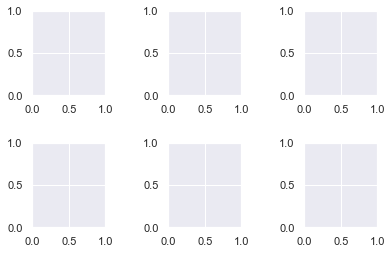

In [81]:
plt.subplots(2,3) # rows, columns
plt.tight_layout(pad=2) # space between

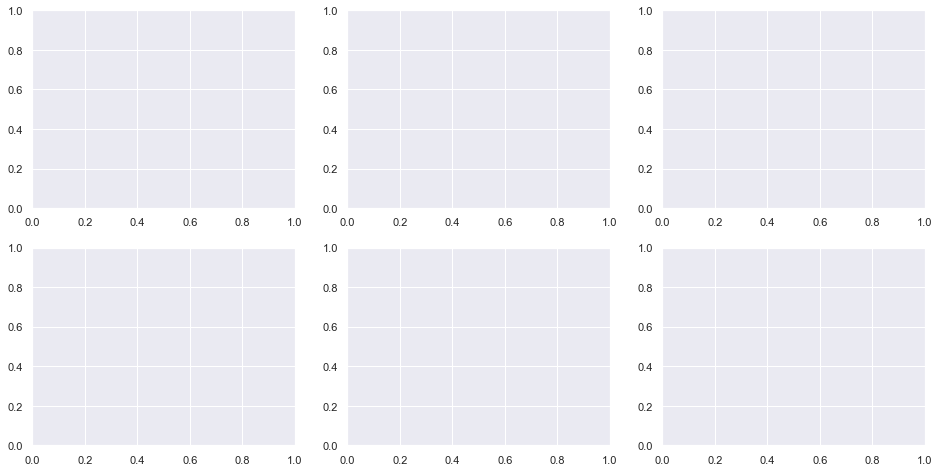

In [98]:
# subplot returns 3 things fig and axes
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

In [99]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [100]:
# axes[0, 0].plot()  and u can plot like this 
# axes[0,1]
# axes[0, 0]set_xlabel("akldfsjf")

# but we can pass axis in seaborn like:
# sns.scatterplot(......, s=100, ax=axes[0, 1]) see the ax one